In [68]:
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:100% !important; }</style>"))



/var/folders/89/g9qfd5w53x7f75_j9jnrxvr00000gn/T/ipykernel_91874/3453545336.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [69]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy
from loguru import logger
import dataloader 
import numpy as np

In [53]:
import importlib

import tf_models  # First, import the library
importlib.reload(tf_models)  # Now, reload it


<module 'tf_models' from '/Users/ziliangpeng/code/naoshima/ml/objcla/tf_models.py'>

In [54]:
import dataloader

dataset = "cifar10"

loader = getattr(dataloader, f"load_{dataset}")
x_train, y_train, x_test, y_test = loader(onehot=True)

logger.info(x_train.shape)
logger.info(x_test.shape)
if x_train[0].ndim == 2:
    x_train = x_train[..., np.newaxis]
    x_test = x_test[..., np.newaxis]
image_shape = x_train[0].shape
logger.info(f"image shape: {image_shape}")

2023-10-02 00:22:18.378 | INFO     | dataloader:_load_keras:30 - Using cifar10 dataset
2023-10-02 00:22:18.378 | INFO     | dataloader:_load_keras:33 - The size is 50000
2023-10-02 00:22:18.379 | INFO     | dataloader:_load_keras:34 - The shape is: (32, 32, 3)
2023-10-02 00:22:18.607 | INFO     | __main__:<module>:8 - (50000, 32, 32, 3)
2023-10-02 00:22:18.607 | INFO     | __main__:<module>:9 - (10000, 32, 32, 3)
2023-10-02 00:22:18.607 | INFO     | __main__:<module>:14 - image shape: (32, 32, 3)


In [55]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.losses import CategoricalCrossentropy
import matplotlib.pyplot as plt
import numpy as np
import dataloader

from tf_models import *

model = AlexNet(image_shape, num_classes=y_train.shape[1], augmentation=True, l2_lambda=0.0002)




In [63]:
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)
#optimizer = 'adam'
# 0.1 lr = ~12%
# 0.01 lr = 0.2188

model.compile(
    optimizer=optimizer, loss=CategoricalCrossentropy(), metrics=["accuracy"]
)

with tf.device("/GPU:0"):
    history = model.fit(
        x_train, y_train, epochs=300, batch_size=64, validation_split=0.2
    )
# Evaluate the model on the test set
# loss, accuracy = model.evaluate(x_test, y_test)
# print(f"Test loss: {loss:.4f}")
# print(f"Test accuracy: {accuracy:.4f}")

Epoch 1/3
625/625 [==============================] - 74s 117ms/step - loss: 1.5269 - accuracy: 0.6186 - val_loss: 1.8340 - val_accuracy: 0.5429
Epoch 2/3
625/625 [==============================] - 79s 126ms/step - loss: 1.4612 - accuracy: 0.6394 - val_loss: 1.5829 - val_accuracy: 0.5968
Epoch 3/3
625/625 [==============================] - 103s 165ms/step - loss: 1.4138 - accuracy: 0.6449 - val_loss: 1.7229 - val_accuracy: 0.5540


In [8]:
model.save('viz.keras')

In [9]:
#model.load_weights('viz.keras')

In [71]:
# find the right index for category X
from collections import defaultdict
import random

m = defaultdict(list)
for i, y in enumerate(y_train):
    y = np.argmax(y)
    m[y].append(i)
    
for i in range(10):
    random.shuffle(m[i])
    print(i, m[i][:3])

0 [42400, 40733, 43073]
1 [3773, 16682, 24807]
2 [40392, 22845, 16695]
3 [27114, 26036, 23239]
4 [23424, 4910, 39785]
5 [7270, 36048, 35155]
6 [20623, 13635, 37227]
7 [21641, 9453, 28030]
8 [1763, 30433, 21249]
9 [14071, 44952, 48450]


[<Axes: > <Axes: > <Axes: > <Axes: >]


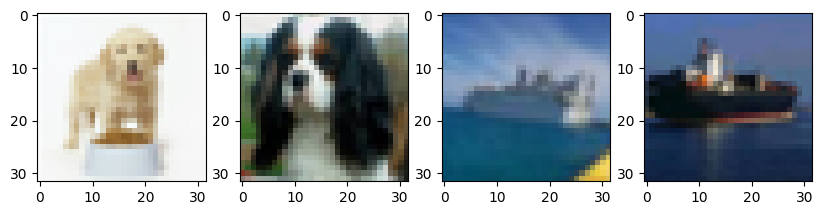

2023-10-02 01:08:14.504 | INFO     | __main__:<module>:25 - (4, 32, 32, 3)
2023-10-02 01:08:14.504 | INFO     | __main__:<module>:26 - random_rotation


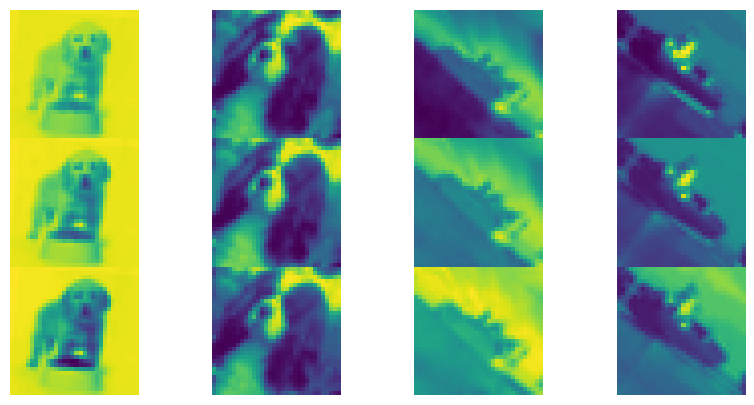

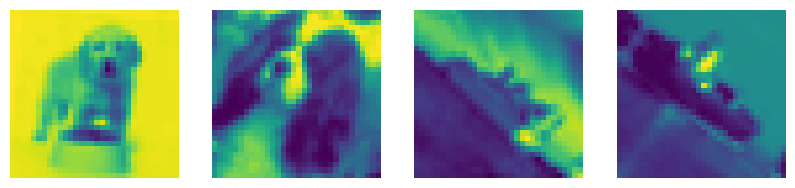

2023-10-02 01:08:14.625 | INFO     | __main__:<module>:25 - (4, 32, 32, 3)
2023-10-02 01:08:14.625 | INFO     | __main__:<module>:26 - random_translation


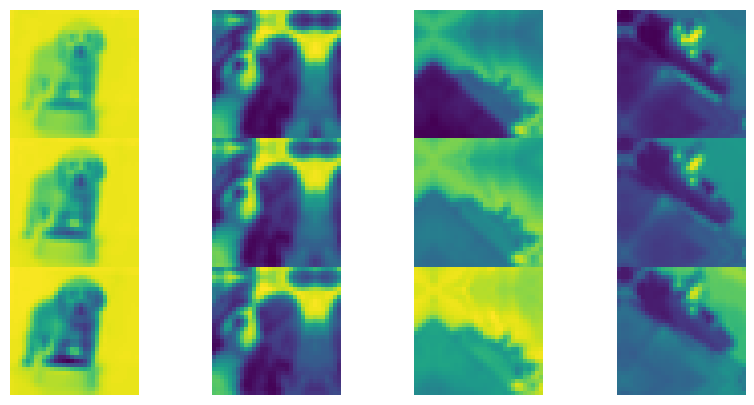

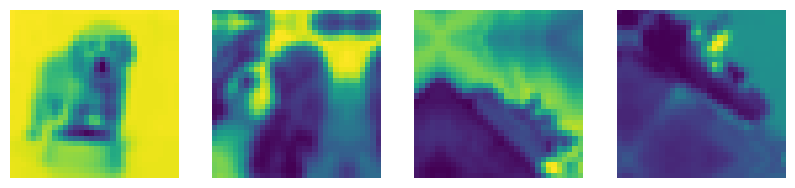

2023-10-02 01:08:14.732 | INFO     | __main__:<module>:25 - (4, 32, 32, 96)
2023-10-02 01:08:14.732 | INFO     | __main__:<module>:26 - conv2d_15


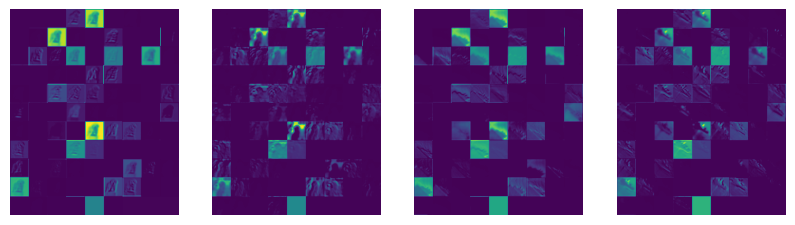

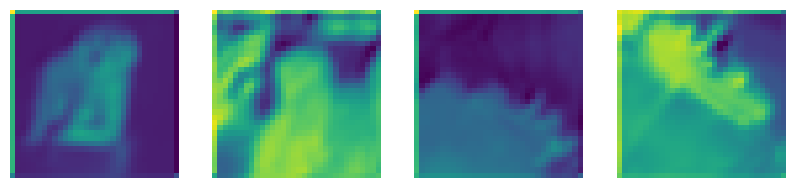

2023-10-02 01:08:15.104 | INFO     | __main__:<module>:25 - (4, 32, 32, 96)
2023-10-02 01:08:15.104 | INFO     | __main__:<module>:26 - batch_normalization_15


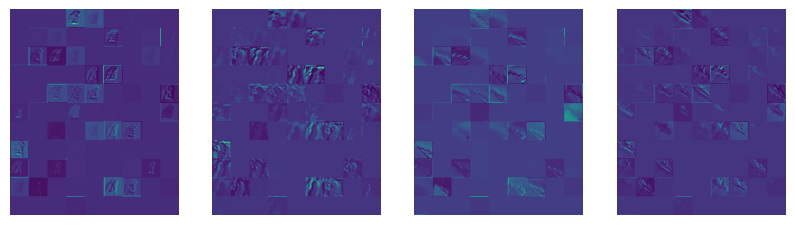

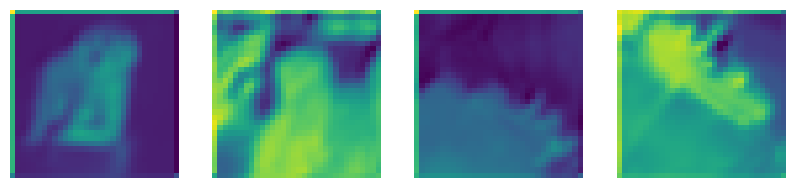

2023-10-02 01:08:15.499 | INFO     | __main__:<module>:25 - (4, 16, 16, 96)
2023-10-02 01:08:15.499 | INFO     | __main__:<module>:26 - max_pooling2d_9


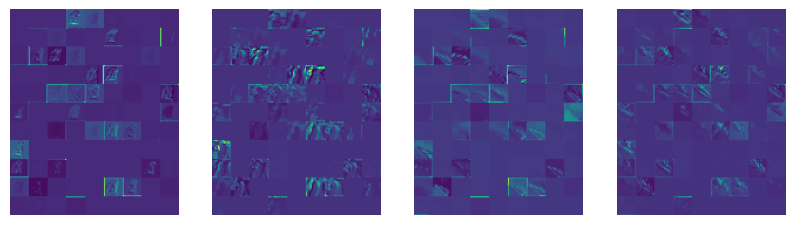

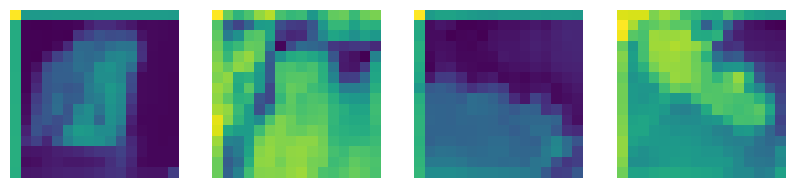

2023-10-02 01:08:16.002 | INFO     | __main__:<module>:25 - (4, 16, 16, 256)
2023-10-02 01:08:16.002 | INFO     | __main__:<module>:26 - conv2d_16


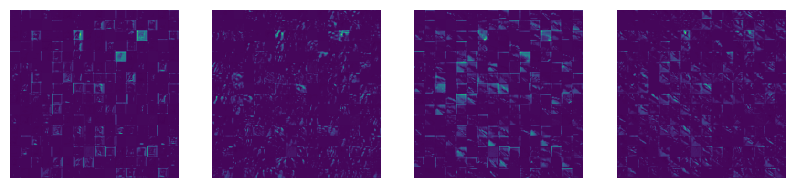

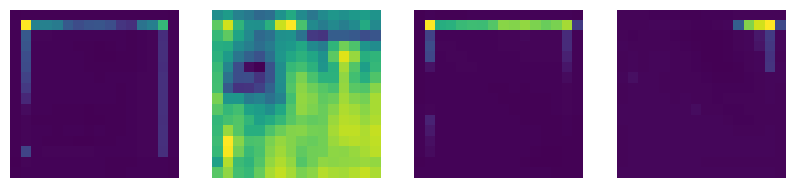

2023-10-02 01:08:16.707 | INFO     | __main__:<module>:25 - (4, 16, 16, 256)
2023-10-02 01:08:16.708 | INFO     | __main__:<module>:26 - batch_normalization_16


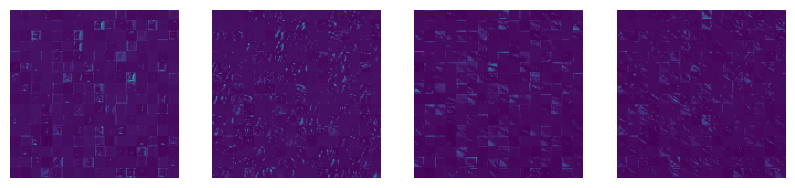

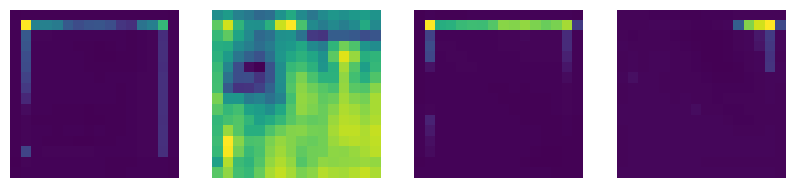

2023-10-02 01:08:17.458 | INFO     | __main__:<module>:25 - (4, 8, 8, 256)
2023-10-02 01:08:17.458 | INFO     | __main__:<module>:26 - max_pooling2d_10


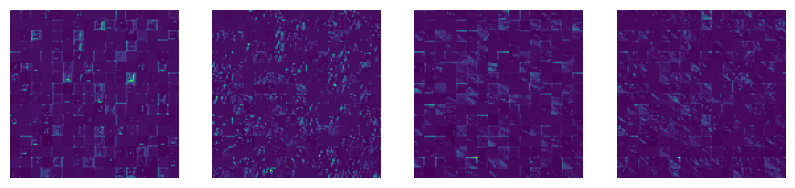

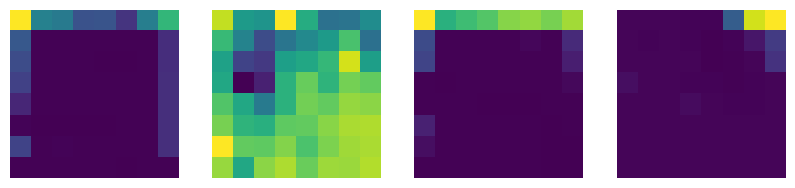

2023-10-02 01:08:18.178 | INFO     | __main__:<module>:25 - (4, 8, 8, 384)
2023-10-02 01:08:18.178 | INFO     | __main__:<module>:26 - conv2d_17


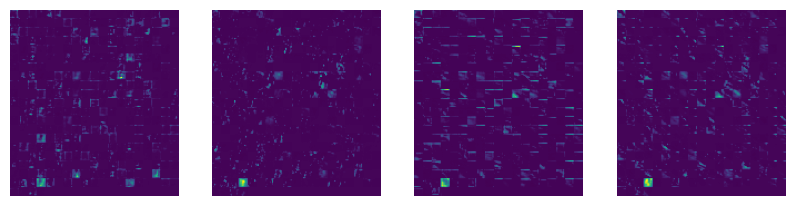

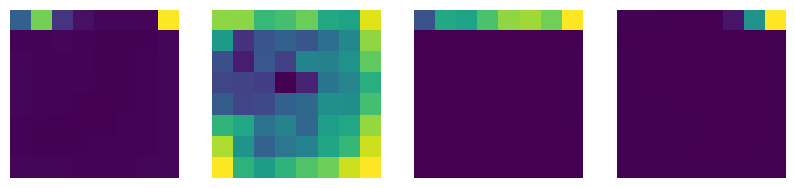

2023-10-02 01:08:19.168 | INFO     | __main__:<module>:25 - (4, 8, 8, 384)
2023-10-02 01:08:19.168 | INFO     | __main__:<module>:26 - batch_normalization_17


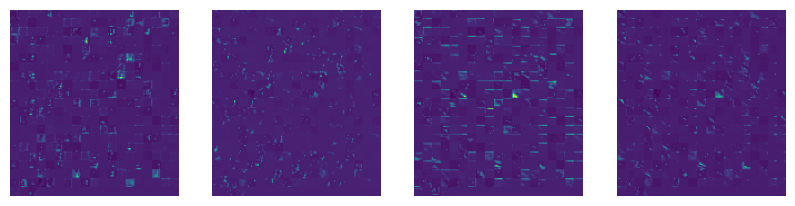

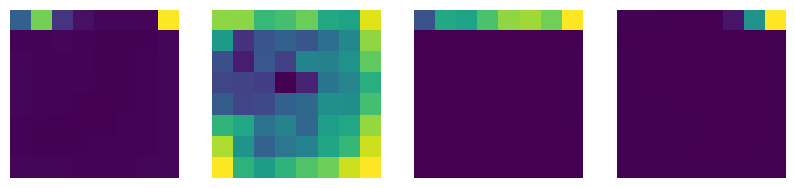

2023-10-02 01:08:20.189 | INFO     | __main__:<module>:25 - (4, 8, 8, 384)
2023-10-02 01:08:20.190 | INFO     | __main__:<module>:26 - conv2d_18


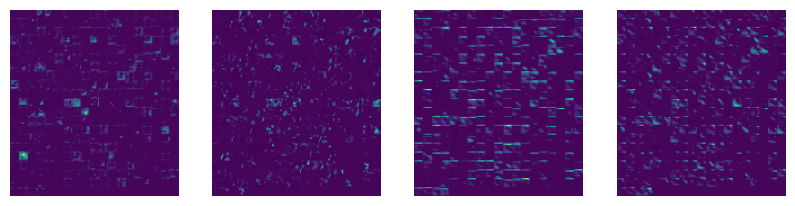

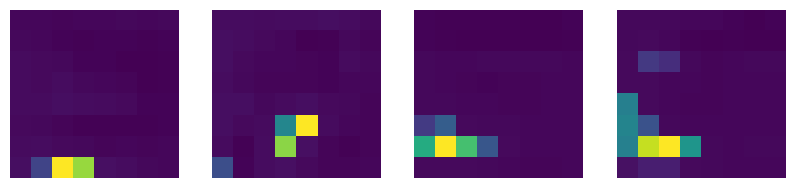

2023-10-02 01:08:21.267 | INFO     | __main__:<module>:25 - (4, 8, 8, 384)
2023-10-02 01:08:21.267 | INFO     | __main__:<module>:26 - batch_normalization_18


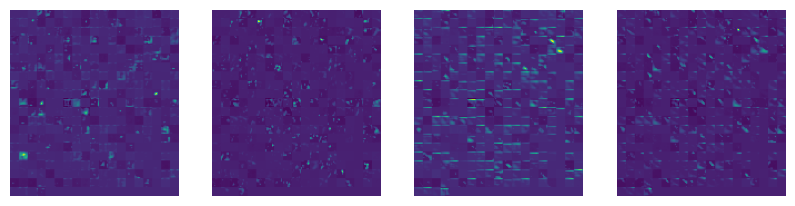

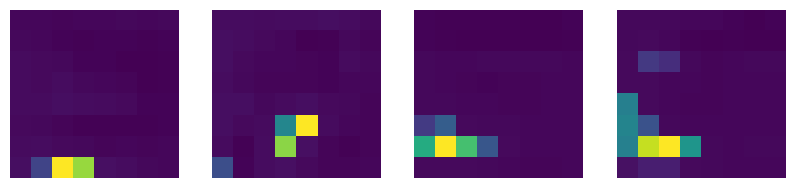

2023-10-02 01:08:22.276 | INFO     | __main__:<module>:25 - (4, 8, 8, 256)
2023-10-02 01:08:22.277 | INFO     | __main__:<module>:26 - conv2d_19


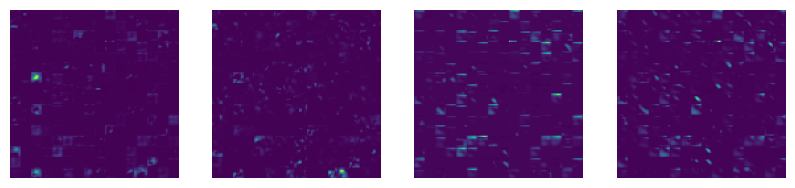

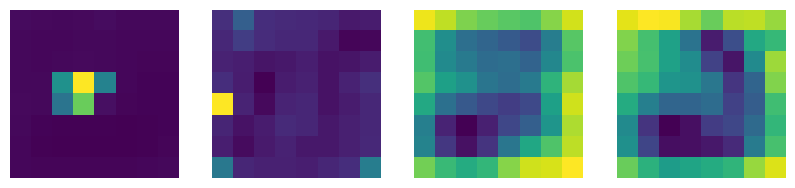

2023-10-02 01:08:23.012 | INFO     | __main__:<module>:25 - (4, 8, 8, 256)
2023-10-02 01:08:23.013 | INFO     | __main__:<module>:26 - batch_normalization_19


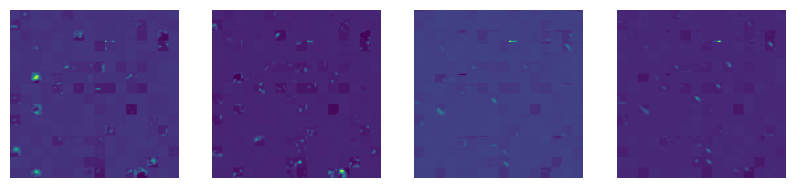

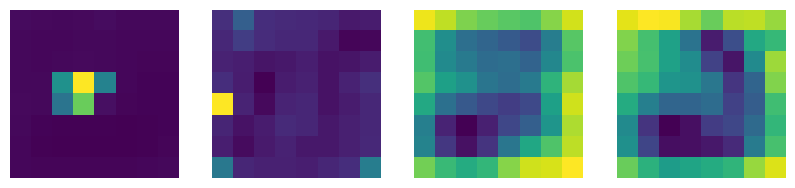

2023-10-02 01:08:23.731 | INFO     | __main__:<module>:25 - (4, 4, 4, 256)
2023-10-02 01:08:23.732 | INFO     | __main__:<module>:26 - max_pooling2d_11


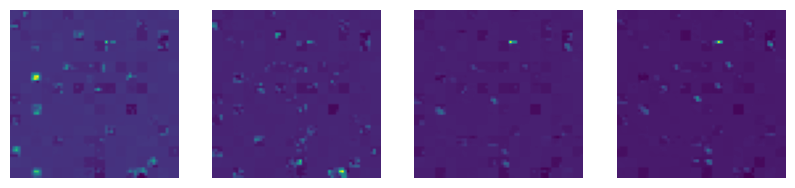

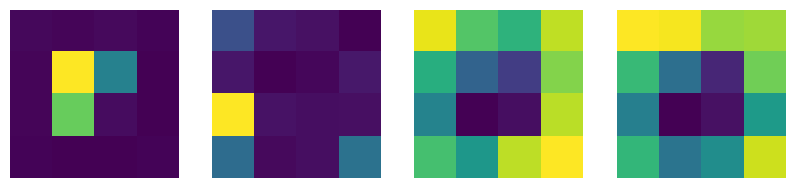

2023-10-02 01:08:24.409 | INFO     | __main__:<module>:25 - (4, 4096)
2023-10-02 01:08:24.410 | INFO     | __main__:<module>:26 - flatten_3


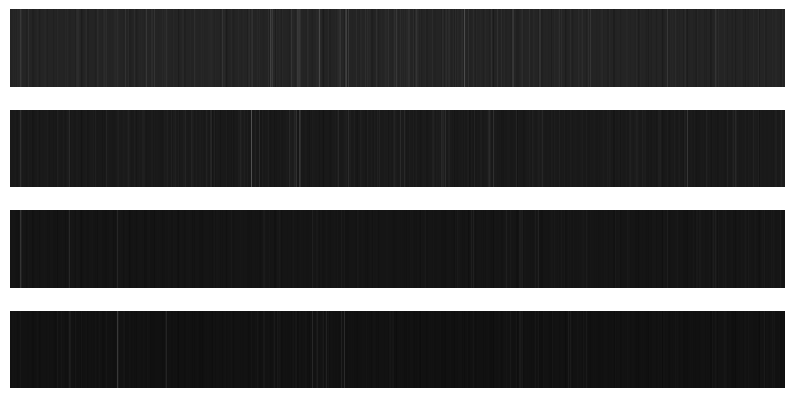

2023-10-02 01:08:24.482 | INFO     | __main__:<module>:25 - (4, 4096)
2023-10-02 01:08:24.482 | INFO     | __main__:<module>:26 - dense_9


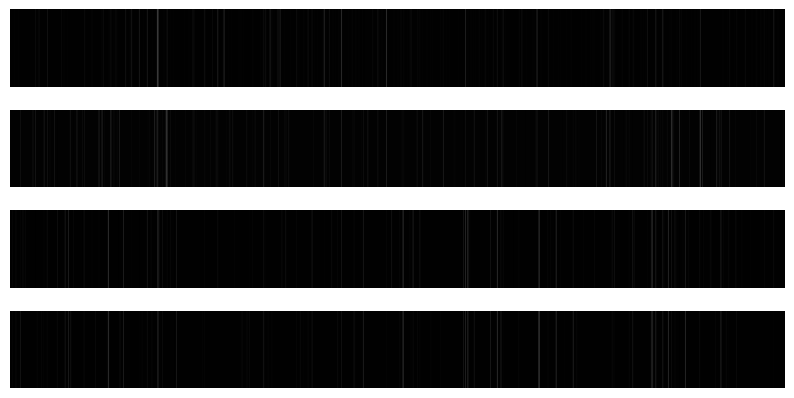

2023-10-02 01:08:24.555 | INFO     | __main__:<module>:25 - (4, 4096)
2023-10-02 01:08:24.556 | INFO     | __main__:<module>:26 - dropout_6


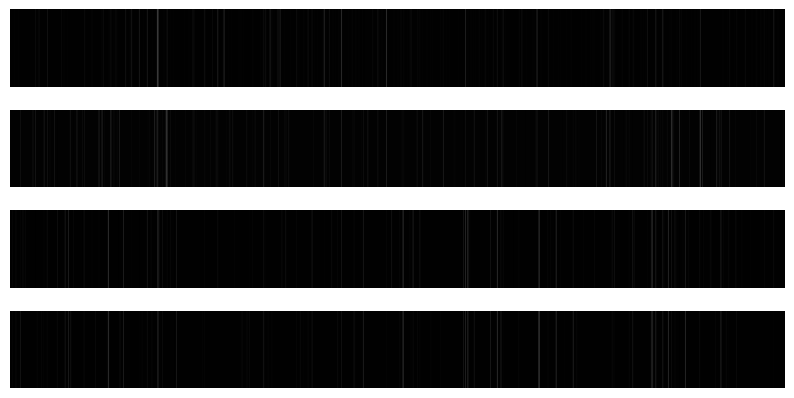

2023-10-02 01:08:24.628 | INFO     | __main__:<module>:25 - (4, 4096)
2023-10-02 01:08:24.629 | INFO     | __main__:<module>:26 - dense_10


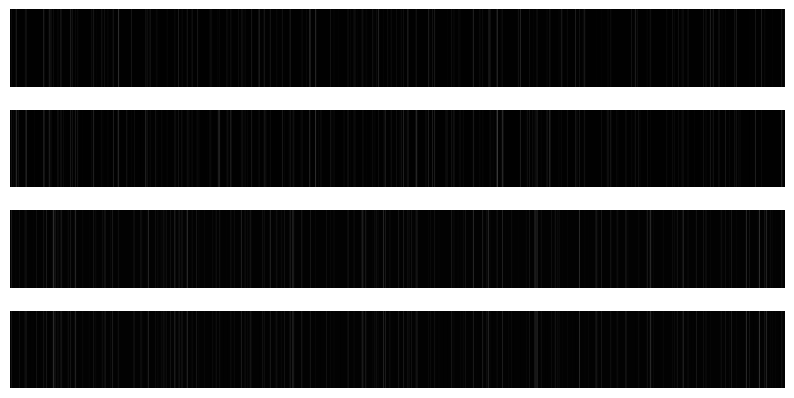

2023-10-02 01:08:24.713 | INFO     | __main__:<module>:25 - (4, 4096)
2023-10-02 01:08:24.713 | INFO     | __main__:<module>:26 - dropout_7


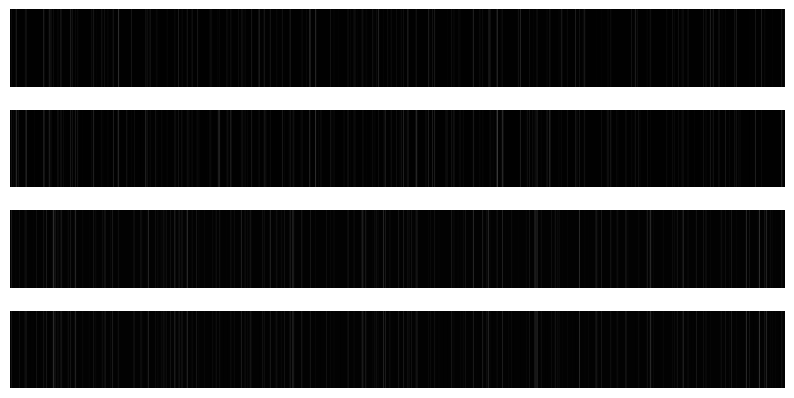

2023-10-02 01:08:24.794 | INFO     | __main__:<module>:25 - (4, 10)
2023-10-02 01:08:24.794 | INFO     | __main__:<module>:26 - dense_11


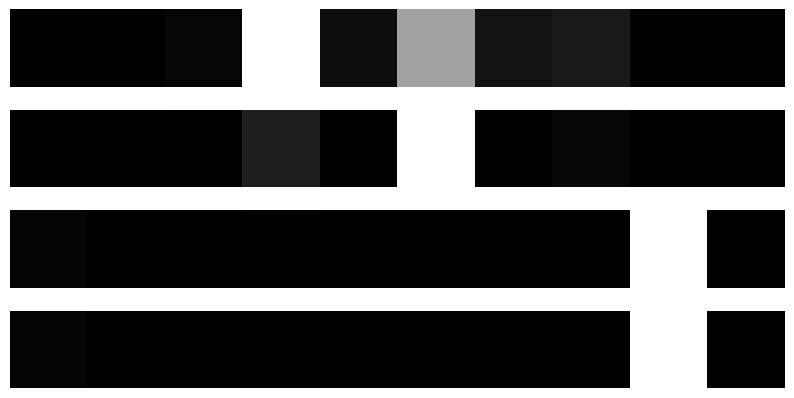

2023-10-02 01:08:25.065 | INFO     | __main__:<module>:37 - [5, 5, 8, 8]
2023-10-02 01:08:25.070 | INFO     | __main__:<module>:38 - [3, 5, 8, 8]


In [76]:
# CNN viz
import math
from viz import vizn_1d, vizn_3d


img_index = [m[5][0],m[5][1],m[8][0],m[8][1]]
n = len(img_index)

img = x_train[img_index]
label = y_train[img_index]
input = x_train[img_index]

fig, imgxs = plt.subplots(1, n, figsize=(10, 5))
print(imgxs)
for i in range(n):
    imgxs[i].imshow(img[i], cmap='viridis')
plt.show()

ls = model.layers
os = []
o = input
for l in ls:
    o = l(o)
    os.append(o)
    logger.info(o.shape)
    logger.info(l.name)
    if o.ndim == 2:
        vizn_1d(o)
    if o.ndim == 4:
        vizn_3d(o)
        vizn_3d(o[:,:,:,1:2])
        #logger.info(o[0:1,:,:,1:2])
        #logger.info(l.weights)
        pass
#logger.info(o)

logger.info([np.argmax(la) for la in label])
logger.info([np.argmax(oi) for oi in o])